# MNIST 손글씨 숫자 인식, 순전파, 배치 프로세싱

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

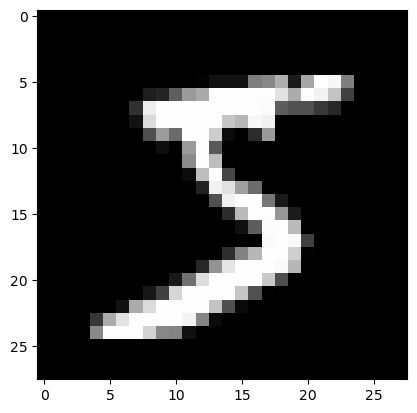

In [3]:
plt.imshow(X_train[0], cmap='gray')

## 자주 사용되는 변수 및 함수 선언

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [6]:
def predict(network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['b1'], network['b2'], network['b3']
    A1 = np.dot(X, W1) + B1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, W3) + B3
    Z3 = softmax(A3)
    y = Z3
    return Z3

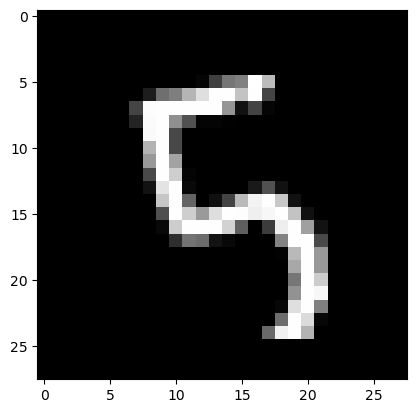

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[1024], cmap='gray')

In [8]:
import pickle
network = None
with open('lecture06_sample_weight.pkl', 'rb') as f:
    network = pickle.load(f)

In [9]:
y = predict(network, X_train[1024].flatten())
pred = np.argmax(y)
print(pred)

8


/var/folders/6h/yz_7x6lx13x2cdhh1474_z3w0000gn/T/ipykernel_87941/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


## 정확도 확인

In [10]:
corrects = 0
for i in range(len(X_train)):
    y = predict(network, X_train[i].flatten())
    pred = np.argmax(y)
    if pred == y_train[i]:
        corrects += 1

print(f'Accuracy: {corrects / len(X_train)}')

/var/folders/6h/yz_7x6lx13x2cdhh1474_z3w0000gn/T/ipykernel_87941/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 0.9251833333333334


## 배치 프로세싱

In [11]:
batch_size = 100
corrects = 0
for i in range(0, len(X_train), batch_size):
    y = predict(network, [np.array(each).flatten() for each in X_train[i:i + batch_size]])
    pred = np.argmax(y, axis=1)
    corrects += np.sum(pred == y_train[i:i + batch_size])

print(f'Accuracy: {corrects / len(X_train)}')

/var/folders/6h/yz_7x6lx13x2cdhh1474_z3w0000gn/T/ipykernel_87941/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 0.9251833333333334
